## Wangle and Analyze Data for WeRateDogs twitter account

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href='#assess'>Data Assessing</a></li>
<li><a href='#clean'>Data Cleaning</a></li>
<li><a href="#analysis">Data Analysis</a></li>
<li><a href="#source">Sources</a></li>
<li><a href="#conclusion">Conclusion</a></li>

</ul>

<a id='intro'></a>
# Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog WeRateDogs has over 4 million followers and has received international media coverage.

Process: 
- Data Gather
- Data Assess
- Data Clean
- Data Analyze/Visualize

#### Key points before start:
- The analysis only for original ratings (no retweets).
- Assessing and cleaning the entire dataset completely would require a lot of time. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](https://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
- Do not need to gather the tweets beyond August 1st, 2017. duo to won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [599]:
# Libraries Used
import pandas as pd
import requests
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# View Options
# To view full columns contant(e.g. text,url, etc)
pd.set_option('display.max_colwidth',500)
# Set iPython's max column width to 32
pd.set_option('display.max_columns', 32)

<a id='gather'></a>
# Gather Data

In [2]:
# Load twitter archive to dataframe
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download image predictions programmatically from Udacity's servers using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode='wb')  as file: file.write(response.content)

# Load image predictions to dataframe
imgpred = pd.read_csv('image-predictions.tsv',sep="\t")

In [4]:
# Load tweet json to dataframe
tweet_json = pd.read_json("tweet-json.txt", lines = True)
tweet_json = tweet_json[['id', 'retweet_count', 'favorite_count']]



# Assessing Data

In [5]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [6]:
twitter_arch.shape

(2356, 17)

In [8]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Comment: 

tweet_id column switch to string 

- **Data quality:** Missing data in columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- **Data quality:**  tweet_id column type need convert to string format
- **Data quality:** timestamp has time zone (e.g. 2017-08-01 16:23:56 **+0000**)
- **Data quality:** timestamp type need convert to datetime format
- **Data tideness:**  One variable(Type of dog) in 4 columns


 <br><br>

In [600]:
twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
# View source unique inputs
twitter_arch.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

#### Comment: 
WeRateDogs use iphone most of the time, twitter_arch have 4 sources;

- Twitter for iPhone
- Twitter Web Client
- Vine - Make a Scene
- TweetDeck

Tweets sources can be shorten (e.g.Twitter for iPhone)

 <br><br>

In [604]:
# To view retweet
twitter_arch.query('retweeted_status_id != "NaN"').sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
546,805823200554876929,NaN,NaN,2016-12-05 17:16:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Reginald. He's one magical puppo. Aerodynamic af. 12/10 would catch https://t.co/t0cEeRbcXJ,7.841832e+17,4.196984e+09,2016-10-07 00:06:50 +0000,"https://vine.co/v/5ghHLBMMdlV,https://vine.co/v/5ghHLBMMdlV",12,10,Reginald,None,None,None,puppo
606,798340744599797760,NaN,NaN,2016-11-15 01:44:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Davey. He'll have your daughter home by 8. Just a stand up pup. 11/10 would introduce to mom https://t.co/E6bGWf9EOm,7.717705e+17,4.196984e+09,2016-09-02 18:03:10 +0000,"https://twitter.com/dog_rates/status/771770456517009408/photo/1,https://twitter.com/dog_rates/status/771770456517009408/photo/1",11,10,Davey,None,None,None,None


In [606]:
# Original tweets
Original_tweets = twitter_arch.shape[0] - twitter_arch.query('retweeted_status_id != "nan"').shape[0]
Original_tweets

2175

#### Comment: 
From key points, the analysis focus on orignal tweets. # of Original tweets 2175

 <br><br>

In [16]:
twitter_arch.isnull().shape[0]

2356

In [17]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Comment: 
rating_denominator mean larger than 10!?

In [18]:
# Check rating_denominator
twitter_arch.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [19]:
# Check who got 0 score
twitter_arch.query('rating_denominator == 0')
# NA in expanded_urls, rating_numerator	

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [20]:
# Check who got 10 score
twitter_arch.query('rating_denominator == 10').shape[0]
#2333 have 10 as rating_denominator

2333

#### Comment: 
Denominator should be fixed to 10 but from 2356 there are 23 have denominator not equal to 10;

- Total: 2356
- Denominator below ten : 3
- Denominator ten: 2333
- Denominator above ten: 20 ( = 2356-3-2333)


#### Data qulity: Set denominators to be 10 throw all rows

 <br><br>

In [21]:
twitter_arch.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [22]:
# Check who got less than 10 as rating
twitter_arch.query('rating_numerator < 10').shape[0]
#440 have less than 10 as rating_numerator

440

In [23]:
# Check who got greater than 10 as rating
twitter_arch.query('rating_numerator > 10').shape[0]
#1455 have greater than 10 as rating_numerator which assist the claim in udacity introduction "numerators most the time greater than 10"

1455

#### Comment: 
Numerator rating analysis;

- Total: 2356
- Denominator below ten : 440
- Denominator ten: 461 ( = 2356-440-1455)
- Denominator above ten: 1455 

#### since it is unique rating system no further clean needed
 <br><br>

#### `imgpred` table

In [24]:
imgpred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Comment: 
from Image Predictions File provided in project page

So for the last row in that table:
- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

 <br><br>

In [25]:
imgpred.shape

(2075, 12)

#### Comment: 
from Image Predictions File provided in project page
- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921

 <br><br>

In [611]:
# imgpred accurcy
imgpred.shape[0]/Original_tweets*100

95.40229885057471

In [607]:
# Number of image missed
Original_tweets - imgpred.shape[0]

100

#### Comment: 
from twitter archive has 2175 Original tweets, however the image predictions miss 100 image and accurcy 95%

 <br><br>

In [26]:
imgpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Comment: 
Other than 100 image, no nulls, tweet_id should be string
 <br><br>

#### `tweet_json` table

In [28]:
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [29]:
tweet_json.shape

(2354, 3)

#### Comment: 

**Data qulity:** to match other table **id** insted of **tweet_id**

 <br><br>

<a id='assess'></a>
## Summize Quality Issues
##### `twitter_arch` table
- Missing data in columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- tweet_id is int type need convert to string format
- Timestamp type need convert to datetime format
- There is a row has rating_denominator as zero
- Set denominators to be 10 throw all rows
- Original tweets and retweets in the same column(drop retweets)

##### `imgpred` table
- imgpred has only 2075 tweet_id with images (imgpred miss 100 image, scraping accurcy 95%)


##### `tweet_json` table
- to match other table **id** insted of **tweet_id**
### Summize Tidiness Issue
- All dataframe are related to each other and can combine in one table
- In `twitter_arch` one variable(Type of dog) in 4 columns

<a id='clean'></a>

# Cleaning Data

In [553]:
# Copy to new dataframe before cleaning
twitter_arch_clean = twitter_arch.copy()
imgpred_clean = imgpred.copy()
tweet_json_clean = tweet_json.copy()

***Define***

- One table with all information about the dogs

***Code***

In [554]:
# merge first two dataframes
tweets = pd.merge(twitter_arch_clean, imgpred_clean,
                            on='tweet_id', how='left')

In [555]:
# To merge need to rename column id into tweet_id
tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

In [556]:
# merge dataframes together
tweets = pd.merge(tweets, tweet_json_clean, 
                            on='tweet_id', how='left')

***Test***

In [557]:
# check
tweets.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


***Define***

- In twitter_arch one variable(Type of dog) in 4 columns

***Code***

In [558]:
# Extract the text from the columns into the new dog_type colunn
tweets['dog_type'] = tweets['text'].str.extract('(doggo|floofer|pupper|puppo)')

***Test***

In [559]:
#check
tweets.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type
1931,674036086168010753,NaN,NaN,2015-12-08 01:21:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Daisy. She has no eyes &amp; her face has been blurry since birth. Quite the trooper tho. Still havin a blast. 9/10 https://t.co/jcNdw43BIP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674036086168010753/photo/1,9,10,Daisy,None,None,None,None,https://pbs.twimg.com/media/CVqoPslWEAEk7EC.jpg,1.0,toy_poodle,0.685617,True,miniature_poodle,0.151936,True,Maltese_dog,0.045531,True,240.0,906.0,NaN
627,794983741416415232,NaN,NaN,2016-11-05 19:24:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rizzy. She smiles a lot. 12/10 contagious af https://t.co/TU4sZogVIq,7.895309e+17,4.196984e+09,2016-10-21 18:16:44 +0000,"https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1",12,10,Rizzy,None,None,None,None,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3.0,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True,3942.0,0.0,NaN
2033,671744970634719232,NaN,NaN,2015-12-01 17:37:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6/10 would cuddle https://t.co/wwwYO9C9kl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671744970634719232/photo/1,6,10,None,None,None,None,None,https://pbs.twimg.com/media/CVKEfMKWoAAR-Ud.jpg,1.0,ice_bear,0.251193,False,ram,0.213839,False,Arctic_fox,0.081551,False,841.0,1430.0,NaN


In [560]:
tweets.dog_type.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

***Define***
- 1) **Quality Issue:** tweet_id type need convert to string format

- 2) **Quality Issue:** Proper Timestamp format(without time zone)

- 3) **Quality Issue:** Timestamp type need convert to datetime format

***Code***

In [561]:
tweets.tweet_id = tweets.tweet_id.astype('str')

# To remove the time zone from the 'timestamp' column
tweets.timestamp = tweets.timestamp.str.slice(start=0, stop=-6)

# Convert timestamp to datetime
tweets.timestamp = pd.to_datetime(tweets.timestamp)

***Test***

In [562]:
tweets.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
jpg_url                               object
img_num                              float64
p1                                    object
p1_conf                              float64
p1_dog                                object
p2        

In [563]:
tweets.timestamp.sample(3)

124    2017-05-28 01:26:04
2059   2015-11-30 04:37:05
602    2016-11-15 21:49:12
Name: timestamp, dtype: datetime64[ns]

***Define***

- 4) **Quality Issue:** There is a row has rating_denominator as zero 

In [564]:
tweets.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,2259.0,NaN


In [565]:
# Since this is not an original tweets delete it

***Code***

In [566]:
# row index want to drop is 313
tweets.drop(313,inplace=True)

***Test***

In [567]:
# This row(denominator == 0) no longer in dataframe
tweets.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type


***Define***

- 5) **Quality Issue:** Set denominators to be 10 throw all rows

***Code***

In [568]:
tweets.rating_denominator = 10

***Test***

In [569]:
tweets.rating_denominator.sample(10)

1515    10
696     10
306     10
1813    10
1867    10
53      10
1763    10
2353    10
1466    10
1426    10
Name: rating_denominator, dtype: int64

***Define***

- 6) **Quality Issue:** Delete retweets from the dataframe

***Code***

In [570]:
# To Keep original tweets only, the columns where retweeted_status_id is NaN(otherwise its retweets)
tweets = tweets.query('retweeted_status_id == "NaN"')

In [571]:
# Number of retweets
twitter_arch.shape[0] - tweets.shape[0]

182

***Test***

In [572]:
tweets.shape

(2174, 31)

***Define***

- 7) **Quality Issue:** Rows no longer needed

***Code***

In [574]:
# Retweets related columns no longer needed
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','doggo', 'floofer', 'pupper', 'puppo']
tweets.drop(drop_columns, axis = 1, inplace=True)

***Test***

In [575]:
tweets.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type


***Define***

- 8) **Quality Issue:** inaccurate names(e.g. dog name "a")

In [584]:
tweets.name.value_counts()[:3]

None       679
a           55
Charlie     11
Name: name, dtype: int64

***Code***

In [589]:
# Remove inaccurate names 
tweets.name = tweets1.name.str.replace('^[a-z]+', 'None')

***Test***

In [590]:
tweets.name.value_counts()[:3]

None       783
Charlie     11
Lucy        11
Name: name, dtype: int64

In [591]:
tweets.query('name == "a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type


## Store

In [440]:
# Storing the dataframe after clean into csv
tweets.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
# Analyze and Visualize

## 1) Analyze Timeframe

In [448]:
# Tweets date
tweets.timestamp.max() - tweets.timestamp.min()

Timedelta('624 days 17:51:48')

In [467]:
# Timeframe analysis for the account
print('Started:', tweets.timestamp.min(),'Ended:', tweets.timestamp.max(), ', Last for:',624//30, 'Months and', 624%30, 'Days')

Started: 2015-11-15 22:32:08 Ended: 2017-08-01 16:23:56 , Last for: 20 Months and 24 Days


In [492]:
monthly_tweets = tweets.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()

,timestamp,tweet_id
0,2015-11-30,300
1,2015-12-31,388
2,2016-01-31,194
3,2016-02-29,125
4,2016-03-31,136


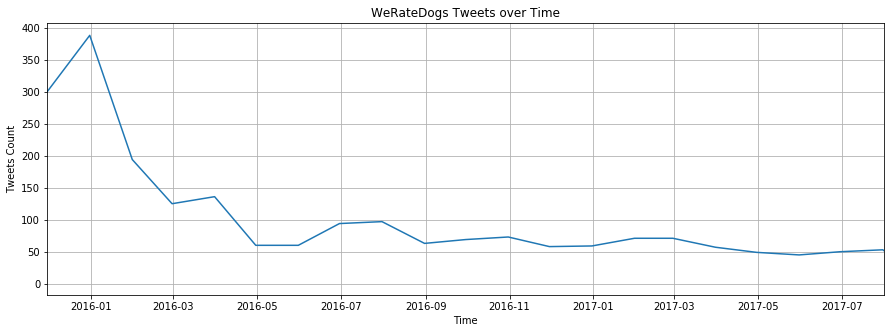

In [493]:
# Plot time vs tweets

plt.figure(figsize=(15, 5))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 8, 1)]) 

plt.xlabel('Time')
plt.ylabel('Tweets Count')
plt.grid()

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');


#### Comment: 
Number of tweets drop after April 2016

 <br><br>

## 2) Analyze dog type tweeted

In [494]:
tweets['dog_type'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_type, dtype: int64

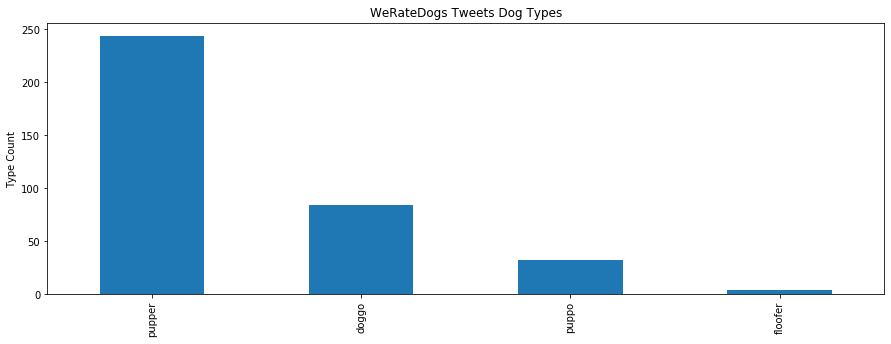

In [507]:
# Plot Dog Types

plt.figure(figsize=(15, 5))

plt.ylabel('Type Count')
plt.grid()

tweets['dog_type'].value_counts().plot(kind = 'bar')
plt.title('WeRateDogs Tweets Dog Types');


#### Comment: 
Highest dog type tweets for Pupper, lowest for floofer

 <br><br>

## 3) Analyze Common dog names

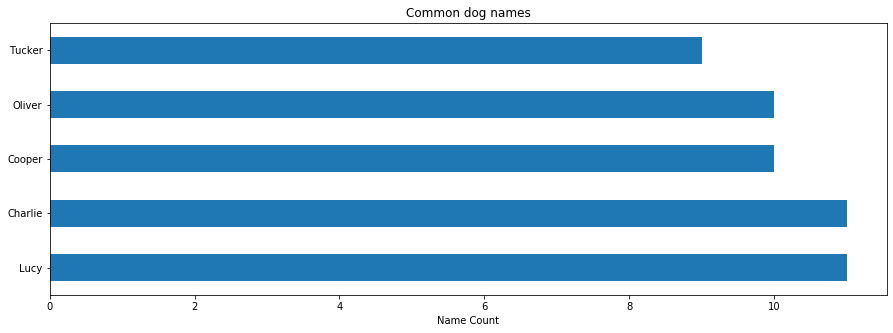

In [598]:
# Plot Dog Types

plt.figure(figsize=(15, 5))

plt.xlabel('Name Count')
plt.grid()

# remove rows with none names
tweets_no_none = tweets.query('name != "None"')
# top 5 names
tweets_no_none['name'].value_counts()[0:5].plot(kind = 'barh');
plt.title('Common dog names');

#### Comment: 
Top 5 dog names are Lucy, Charlie, Cooper, Oliver, Tucker

 <br><br>

<a id='source'></a>
# Source
- [Stackoverflow replace all characters](https://stackoverflow.com/questions/42093663/replace-all-characters-in-string-beside-a-z-0-9-and)
- [Datetime library](https://docs.python.org/3/library/datetime.html)
- [Matplotlib Tutorial](https://matplotlib.org/3.3.0/tutorials/index.html)

<a id='conclusion'></a>
# Conclusion

After analyze WeRateDogs Twitter account there were multiple data quality and tidiness issues that need to wrangle before getting into data analysis. The number of tweets and time frame wasn't convenient to do further analysis like test engagement of the tweets especially after drop in April 2016.